In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# dataset: Social_Network_Ads.csv
# location: https://mitu.co.in/dataset

In [6]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [8]:
df.shape

(400, 5)

In [10]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
# separate input and output data

x = df[['Age', 'EstimatedSalary']]

y = df['Purchased']

In [14]:
df ['Purchased']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [16]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

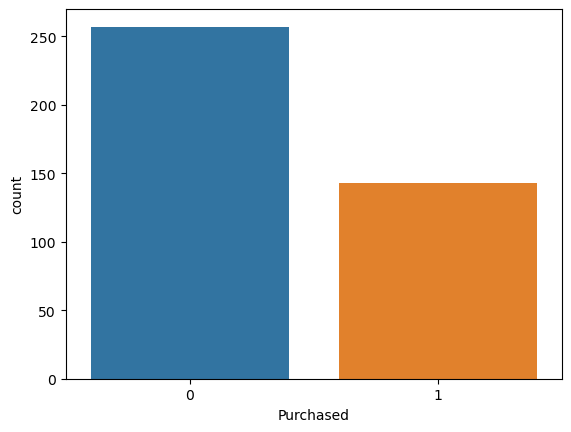

In [18]:
sns.countplot(x = y);

In [20]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


### feature scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [25]:
pd.DataFrame(x_scaled).describe()

,0,1
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


#### cross validation

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                   random_state= 0, test_size= 0.25)

In [30]:
x_train.shape

(300, 2)

In [32]:
y_train.shape

(300,)

### Build the model

In [34]:
from sklearn.svm import SVC

In [38]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

### prediction on test data

In [42]:
y_pred = svc.predict(x_test)

In [44]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [46]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

#### Performance Evaluation

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

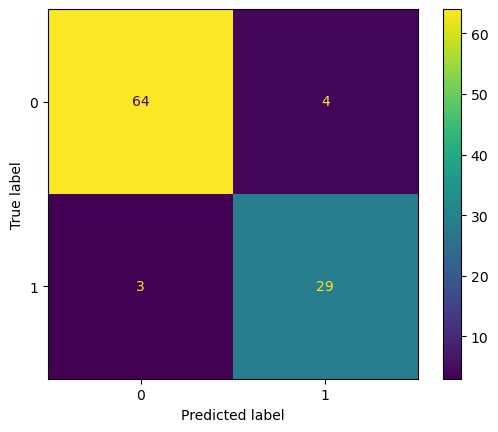

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [53]:
accuracy_score(y_test, y_pred)

0.93

## Bagging of SVM

In [56]:
from sklearn.ensemble import BaggingClassifier

In [58]:
bag = BaggingClassifier(svc, random_state= 0, n_estimators = 5)

In [60]:
bag.fit(x_train, y_train)

BaggingClassifier(estimator=SVC(), n_estimators=5, random_state=0)

In [62]:
y_pred = bag.predict(x_test)

In [64]:
accuracy_score(y_test, y_pred)

0.93